In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('df.csv',low_memory=False)
df['pet']=df['pet']*1
df['party']=df['party']*1
df['guest']=df['guest']*1
df.head()


df.columns.values

In [3]:
cluster_data=df.ix[:,2:]

cluster_data

In [6]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
pca = PCA()
cluster_scaled = preprocessing.scale(cluster_data)
pcaResults = pca.fit(cluster_scaled)

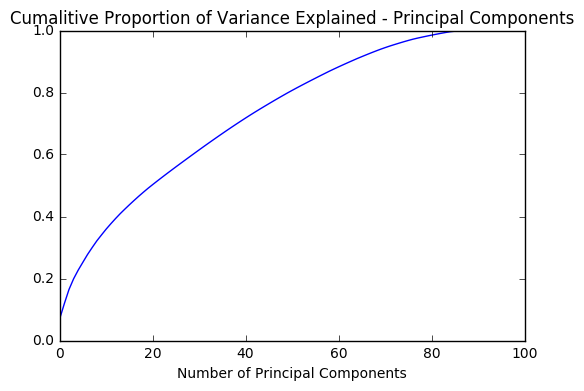

In [7]:
plt.plot(np.cumsum(pcaResults.explained_variance_ratio_))
plt.title('Cumalitive Proportion of Variance Explained - Principal Components')
plt.xlabel('Number of Principal Components')
plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Imputer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X=cluster_data
y=df.ix[:,'price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

tunedParameters=[{'n_estimators':range(50,100,10)}]
clf=GridSearchCV(RandomForestRegressor(n_jobs = -1, criterion='mse'), param_grid = tunedParameters,cv=10)

clf.fit(X, y)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
                                              


0.688 (+/-0.064) for {'n_estimators': 50}
0.691 (+/-0.063) for {'n_estimators': 60}
0.692 (+/-0.063) for {'n_estimators': 70}
0.692 (+/-0.063) for {'n_estimators': 80}
0.693 (+/-0.061) for {'n_estimators': 90}


In [12]:
from sklearn.ensemble import ExtraTreesRegressor
clf1=GridSearchCV(ExtraTreesRegressor(n_jobs = -1, criterion='mse'), param_grid = tunedParameters,cv=10)

clf1.fit(X, y)

means = clf1.cv_results_['mean_test_score']
stds = clf1.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf1.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
                                              

0.689 (+/-0.074) for {'n_estimators': 50}
0.691 (+/-0.072) for {'n_estimators': 60}
0.693 (+/-0.075) for {'n_estimators': 70}
0.691 (+/-0.078) for {'n_estimators': 80}
0.694 (+/-0.075) for {'n_estimators': 90}


In [ ]:
X=cluster_data
y=df.ix[:,'price']
from collections import OrderedDict
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
ensemble_clfs = [("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=0))]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 100

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

from sklearn.ensemble import RandomForestRegressor

X=cluster_data
y=df.ix[:,'price']
tunedParameters = [{'n_estimators':100}]

clf2 = RandomForestRegressor(n_jobs = 1, criterion='mse', n_estimators=100)
#Fit Model
clf2.fit(X, y)

In [10]:
FeatImp = pd.DataFrame({'feature': list(X.columns), 'importance': list(clf2.feature_importances_)})
FeatImp = FeatImp.sort('importance', ascending = False)
#Set Index To Field You want to Sort Bar Chart By
FeatImp = FeatImp.set_index('feature')
FeatImp.head(100)
FeatImp.to_csv('feature_imp.csv')

D:\anaconda\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [12]:
FeatImp.index[0:30]

Index([u'Entire home/apt', u'bathrooms', u'Zillow_Rent_Index', u'bedrooms',
       u'cleaning_fee', u'availability', u'accommodates', u'last_review_time',
       u'duration', u'guests_included', u'review_scores_rating',
       u'extra_people', u'security_deposit', u'beds', u'minimum_nights',
       u'maximum_nights', u'host_acceptance', u'host_response_rate',
       u'review_scores_location', u'review_scores_cleanliness', u'Gym',
       u'Dryer', u'Indoor Fireplace', u'Washer', u'review_scores_accuracy',
       u'Doorman', u'Cable TV', u'Elevator in Building',
       u'Suitable for Events', u'review_scores_value'],
      dtype='object', name=u'feature')

In [13]:
FeatImp['importance'].values[0:30]

array([ 0.30926086,  0.15040988,  0.12860594,  0.06177607,  0.04676225,
        0.03700962,  0.03250765,  0.02151721,  0.01745129,  0.01313237,
        0.01293224,  0.01091011,  0.00907793,  0.00891976,  0.00828189,
        0.00792116,  0.00750386,  0.00577773,  0.00423404,  0.00369935,
        0.00338436,  0.00332584,  0.00329572,  0.00299346,  0.00294994,
        0.00292753,  0.00291907,  0.00284462,  0.00269788,  0.00262179])

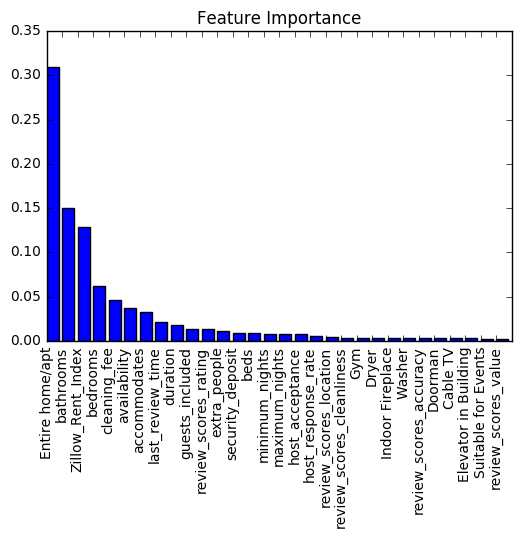

In [16]:
import matplotlib.pyplot as plt
plt.figure()

plt.title("Feature Importance")
y_pos = np.arange(len(FeatImp.index[0:30]))
plt.bar(y_pos,FeatImp['importance'].values[0:30])
plt.xticks(y_pos, FeatImp.index[0:30],rotation='vertical')
plt.show()